# TP 5 - Perceptron

Dans ce TP, nous allons implémenter un perceptron simple avec des donnéres en 2 dimensions. On pourra donc les visualiser ainsi que la frontière de décision produite par le perceptron. 

On évaluera notre algorithme en fin de TP avec l'accuracy, le rappel et la précision.

In [2]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_classification


## Données 

Nous allons utiliser pour commencer un jeu de données très simple. Executer le cellule suivante pour avoir les données et les labels associés. 

In [3]:
dataset =np.array([[2.7810836,2.550537003],
	[1.465489372,2.362125076],
	[3.396561688,4.400293529],
	[1.38807019,1.850220317],
	[3.06407232,3.005305973],
	[7.627531214,2.759262235],
	[5.332441248,2.088626775],
	[6.922596716,1.77106367],
	[8.675418651,-0.242068655],
	[7.673756466,3.508563011]])

label = [0,0,0,0,0,1,1,1,1,1]


En utilisant scatter, afficher le dataset, en colorant les points par leur label. 

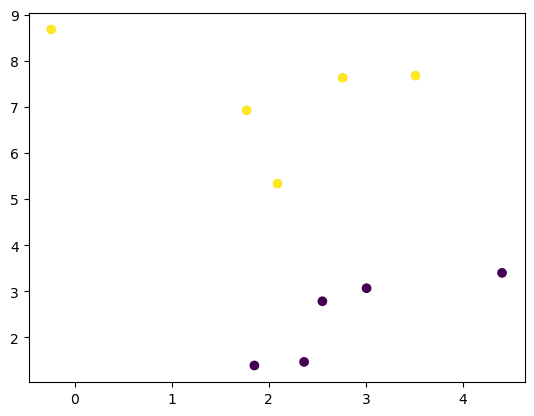

In [4]:

plt.scatter(dataset[: ,1],dataset[: ,0],c=label)


## Perceptron

Implémenter une fonction prediction, qui prend en paramètre un exemple de la base de données, les poids et le biais du perceptron, et renvoie la sortie du perceptron. 
La fonction d'activation du perceptron vaut 1.0 si la somme pondérée des entrée et des poids est positive et zero sinon. 

In [5]:
def predict( ex,w,b ) : 
  p=w*ex
  s=np.sum(p)
  f=s+b
  if f<0:
   return 0
  else:
   return 1

Choississez des poids et un biais aléatoires et tester votre fonction sur la base de données. 
Afficher, pour chaque exemple, la prédiction et le label de l'exemple.

In [6]:
w=np.array([1,-1])
b=0
ybar=np.zeros((10))
for i in range (10):
  ybar[i]=(predict(dataset[i,:],w,0))
  


In [7]:
print(ybar)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


Afficher le dataset ainsi que la frontière de décision du perceptron dont vous avez choisi les poids aléatoirement. 

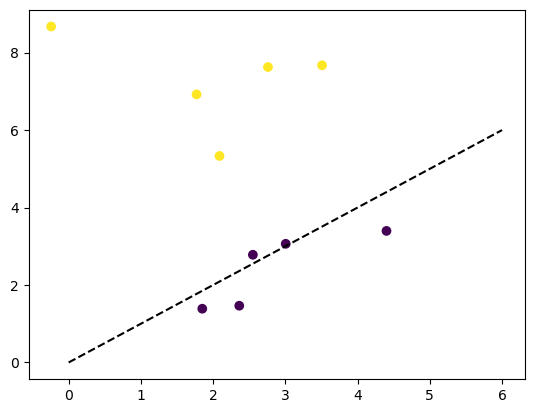

In [8]:
x = np.linspace(0,6,100)
plt.plot(x,(w[0]*x+b)/-w[1],'--k')
plt.scatter(dataset[: ,1],dataset[: ,0],c=label)

On va maintenant implémenter l'algorithme d'apprentissage des poids du perceptron. 

Donner une fonction train_weights(train, label, l_rate, n_epoch), qui prend en paramètres la base de données et ses labels, le learning rate et le nombre d'époques et qui apprend les poids du perceptron.

In [9]:
def train_weights(train, label, l_rate, n_epoch):
  w=np.array([0,0])
  b=0
  for i in range(n_epoch):
    for j in range(len(train)):
     w=w-l_rate*(predict(train[j],w,b)-label[j])*train[j]
     b=b-l_rate*(predict(train[j],w,b)-label[j])
    
  
  return b,w

In [10]:
b1,w1=train_weights(dataset,label,0.2,100)
print(b1,w1)

0.0 [ 0.4130728  -0.46836235]


Afficher la frontière de décision apprise ainsi que les données du dataset colorées par leur label. 

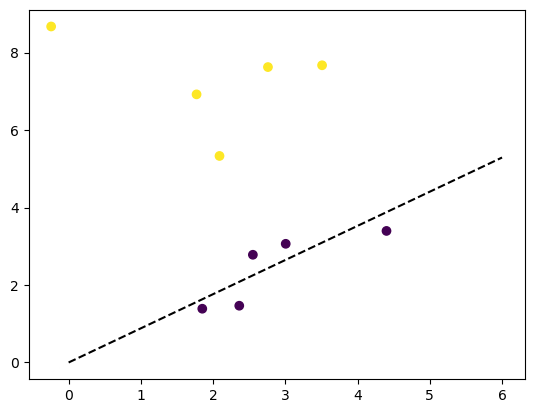

In [11]:
x = np.linspace(0,6,100)
plt.plot(x,-(w1[0]*x+b1)/w1[1],'--k')
plt.scatter(dataset[: ,1],dataset[: ,0],c=label)

On va maintenant utiliser make_classification de sklearn qui fabrique des ensembles de données aléatoires pour des problématiques de classification. 

Lisez la documentation de la fonction https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html et donnez le code permettant de générer un ensemble de 100 exemples de dimensions 2 répartis en deux classes avec un clutser par classe.


Text(0, 0.5, 'Feature')

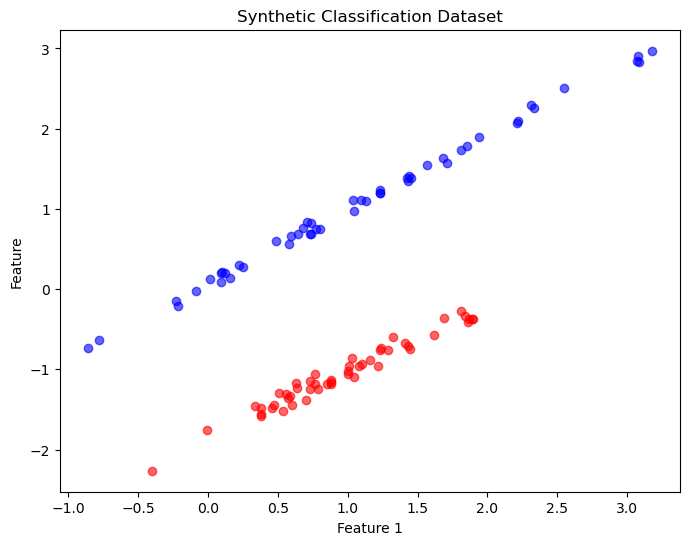

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate the synthetic dataset
X, y = make_classification(
    n_samples=100,        # Total samples
    n_features=2,         # Total features
    n_informative=2,      # Informative features
    n_redundant=0,        # Redundant features
    n_repeated=0,         # Repeated features
    n_classes=2,          # Number of classes
    n_clusters_per_class=1, 
    random_state=42
)

# Create a figure for plotting
plt.figure(figsize=(8, 6))

# Scatter plot for Class 0
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', alpha=0.6)

# Scatter plot for Class 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.6)

# Add title and labels
plt.title('Synthetic Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature')


Implémenter un split train/test de ces données. 

In [ ]:
# votre code ici

Entrainez un perceptron sur ces données. 



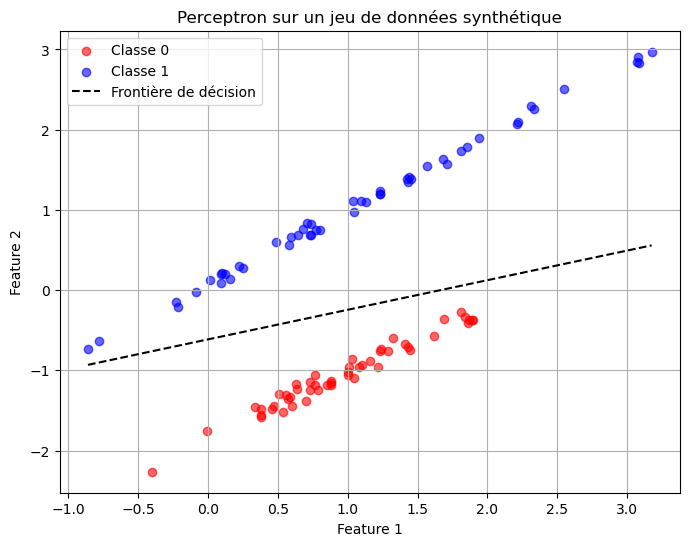

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Générer le jeu de données
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# Fonction de prédiction du perceptron
def predict(X, w, b):
    return np.where(np.dot(X, w) + b >= 0, 1, 0)

# Fonction d'entraînement du perceptron
def train_perceptron(X, y, learning_rate=0.1, n_epochs=100):
    # Initialiser les poids et le biais
    w = np.zeros(X.shape[1])
    b = 0
    
    for epoch in range(n_epochs):
        for i in range(len(X)):
            # Prédire la classe
            y_pred = predict(X[i], w, b)
            # Mettre à jour les poids et le biais
            w += learning_rate * (y[i] - y_pred) * X[i]
            b += learning_rate * (y[i] - y_pred)
    
    return w, b

# Entraîner le perceptron
w, b = train_perceptron(X, y, learning_rate=0.1, n_epochs=100)

# Visualiser les données et la frontière de décision
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Classe 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1', alpha=0.6)

# Tracer la frontière de décision
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, '--k', label='Frontière de décision')

# Ajouter des titres et des légendes
plt.title('Perceptron sur un jeu de données synthétique')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


Afficher la frontière de décision sur les données d'entrainement puis sur les données de test. 

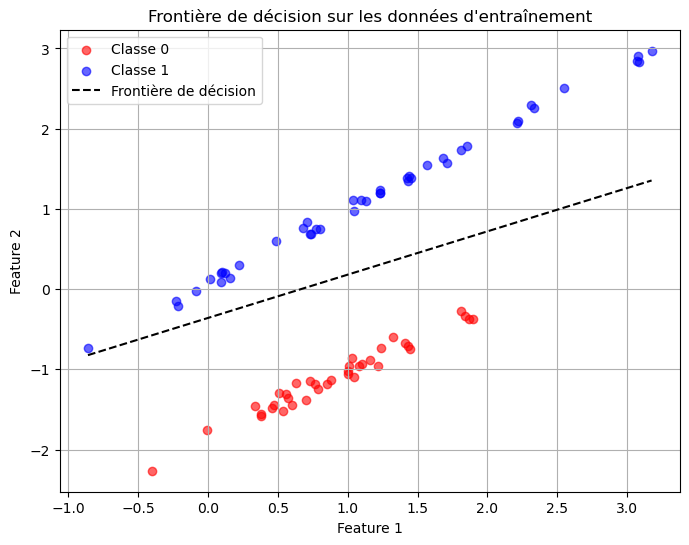

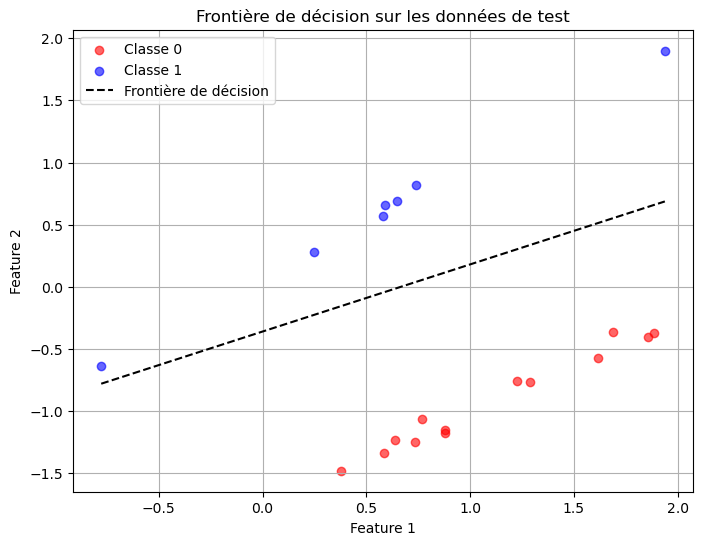

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le perceptron sur les données d'entraînement
w, b = train_perceptron(X_train, y_train, learning_rate=0.1, n_epochs=100)

# Fonction pour afficher la frontière de décision
def plot_decision_boundary(X, y, w, b, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Classe 0', alpha=0.6)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1', alpha=0.6)

    # Tracer la frontière de décision
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(w[0] * x_values + b) / w[1]
    plt.plot(x_values, y_values, '--k', label='Frontière de décision')

    # Ajouter des titres et des légendes
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Afficher la frontière de décision sur les données d'entraînement
plot_decision_boundary(X_train, y_train, w, b, 'Frontière de décision sur les données d\'entraînement')

# Afficher la frontière de décision sur les données de test
plot_decision_boundary(X_test, y_test, w, b, 'Frontière de décision sur les données de test')

Calculer l'accuracy, la précision et le rappel sur l'ensemble de test. 

Accuracy: 1.00
Précision: 1.00
Reappel: 1.00


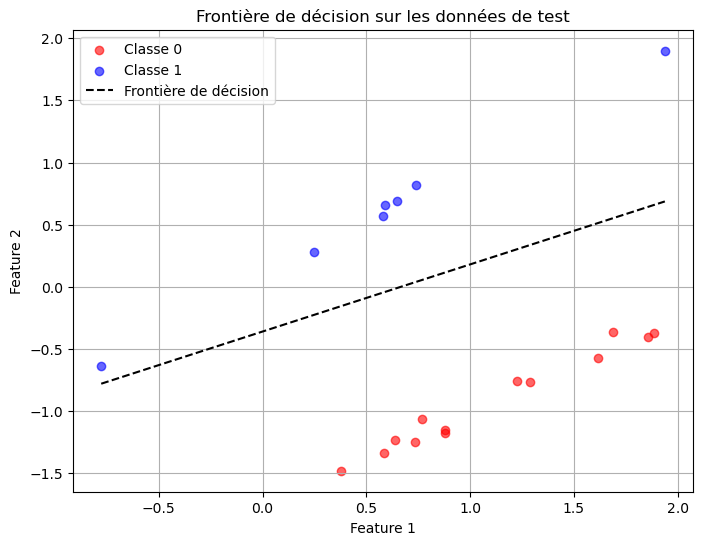

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Prédire les classes sur l'ensemble de test
y_pred = predict(X_test, w, b)

# Calculer l'accuracy, la précision et le rappel
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Afficher les résultats
print(f'Accuracy: {accuracy:.2f}')
print(f'Précision: {precision:.2f}')
print(f'Reappel: {recall:.2f}')

# Optionnel : Afficher la frontière de décision sur les données de test
plot_decision_boundary(X_test, y_test, w, b, 'Frontière de décision sur les données de test')
